In [1]:
"""
Script defining EvilMouDataSet Class and loaders to be used along with VAE model.
"""
import os, sys
import argparse
import numpy as np
import random
import torch
import time
import glob
from wfield import * #for loading wfield data in nice format
import torch
from torch.utils.data import Dataset, DataLoader
import h5py
from pathlib import Path
import pickle

In [19]:
class EvilMouDataSet(torch.utils.data.Dataset):
    """
    Defines EvilMouDataSet to be used with VAE model.
    This is NOT efficient at all in terms of mem usage.
    You might wish to do something like having your dset be list of .h5 files
    And then in the __getitem__ method pick only file and corresponding slices you want.
    """
    def __init__(self, video_dir, mnist_pt_path, transform=None):
        #collect all file names for files containing different frames
        all_frames = []
        for frame in Path(video_dir).rglob('frame*.h5'):
            all_frames.append(str(frame))
        #get first set of frames
        #load them
        f0 = h5py.File(all_frames[0], 'r+')
        all_data = f0['cam1'][:]
        #now read in rest of them and concatenate them over last axis
        #this should give an array with all frames in dset (160, 120, 89900)
#         for i in range(1, len(all_frames)):
#             f = h5py.File(all_frames[i], 'r+')
#             f_data = f['cam1'][:]
#             all_data = np.concatenate((all_data, f_data), axis=2)
        self.df            = all_data
        self.max           = np.amax(all_data.flatten())
        self.min           = np.amin(all_data.flatten())
        self.mean          = np.mean(all_data.flatten())
        self.transform     = transform
        self.mnist_pt_path = mnist_pt_path
        # Load the pt for MNIST 
        self.mnist_data, self.mnist_targets = torch.load(self.mnist_pt_path)
    def __len__(self):
        """
        Returns number of samples in dset
        """
        return (int(self.df.shape[2] - 1))
    def __getitem__(self, idx):
        """
        Returns a single sample from dset.
        """
        time_start = idx
        time_end = time_start + 1 #am picking 1 frames at time here, this might be too much for your data!
        frame = self.df[:, :, time_start:time_end]
        scld_frame = np.true_divide((frame - self.min), (self.max - self.min)) #min/max norm (global)
        video_data = torch.from_numpy(scld_frame)
        mnist_img, mnist_target = self.mnist_data[idx], int(self.mnist_targets[idx])
        return video_data, mnist_img/255


In [ ]:
# batch_size = 10
# VIDEO_PATH          = "/hdd/achint_files/musall_behavior"
# MNIST_TRAINING_PATH = "/home/achint/Practice_code/VAE/MNIST/MNIST/processed/training.pt"


# loaders_dict = EvilMouDataSet(video_dir=VIDEO_PATH,mnist_pt_path=MNIST_TRAINING_PATH)

In [18]:
# loaders_dict

In [15]:
# for i,joint_data in enumerate(loaders_dict):
#     if i == 200:
#         print(joint_data[0].min()) 

tensor(0.0040, dtype=torch.float64)


In [3]:
# TRAINING_PATH = "/hdd/achint_files/musall_behavior/downsampled_videos"
# dataset_train = EvilMouDataSet(data_dir = TRAINING_PATH)


TypeError: __init__() got an unexpected keyword argument 'data_dir'

In [27]:
# import pickle
# pickle.dump( dataset_train, open( "/hdd/achint_files/musall_behavior/video_dataset.p", "wb" ) )

In [ ]:
# dataset_train = pickle.load( open( "/hdd/achint_files/musall_behavior/video_dataset.p", "rb" ) )


In [ ]:
# batch_size=1
# dataset_train_loader = DataLoader(
#     dataset_train,
#     batch_size=batch_size,
#     shuffle=True,
#     drop_last=True
# )

In [25]:
# train_features = next(iter(dataset_train_loader))
    

In [26]:
# train_features['frame'].size()

torch.Size([1, 160, 120, 1])

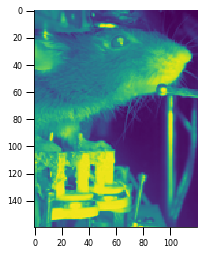

In [27]:
# import matplotlib.pyplot as plt
# plt.imshow(train_features['frame'].squeeze())

In [3]:
# file_path = "/hdd/achint_files/wfield_data/frames_2_540_640_uint16.dat"
# data = mmap_dat(file_path)

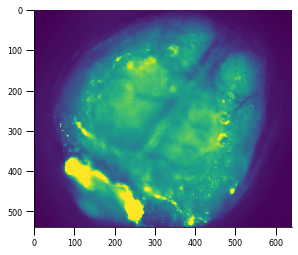

In [15]:
# plt.imshow(data[0,1])

In [33]:
# data[0].flatten()

memmap([1491, 1509, 1478, ..., 1658, 1628, 1612], dtype=uint16)

In [ ]:
# x=[]
# for i in range( 5 ):
#     (data.flatten())

In [60]:
# np.shape(data[0:100].flatten())

(69120000,)

In [6]:
# data[0]

memmap([[[1491, 1509, 1478, ..., 1459, 1471, 1440],
         [1415, 1333, 1379, ..., 1414, 1348, 1342],
         [1417, 1355, 1366, ..., 1404, 1340, 1406],
         ...,
         [1500, 1533, 1505, ..., 1514, 1525, 1445],
         [1490, 1573, 1498, ..., 1482, 1477, 1480],
         [1663, 1678, 1665, ..., 1615, 1548, 1566]],

        [[1494, 1516, 1468, ..., 1459, 1444, 1433],
         [1404, 1362, 1378, ..., 1392, 1350, 1373],
         [1369, 1390, 1365, ..., 1440, 1419, 1399],
         ...,
         [1834, 1763, 1798, ..., 1594, 1595, 1525],
         [1792, 1806, 1800, ..., 1562, 1530, 1529],
         [1892, 1895, 1910, ..., 1658, 1628, 1612]]], dtype=uint16)

In [ ]:
# class EvilMouDataSet(Dataset):
#     def __init__(self, data_dir, transform=None):
#         #collect all file names for files containing different frames
#         all_frames = []
#         for frame in Path(data_dir).rglob('frame*.h5'):
#             all_frames.append(str(frame))
#         #get first set of frames
#         #load them
#         f0 = h5py.File(all_frames[0], 'r+')
#         all_data = f0['cam1'][:]
#         #now read in rest of them and concatenate them over last axis
#         #this should give an array with all frames in dset (160, 120, 89900)
#         for i in range(1, len(all_frames)):
#             f = h5py.File(all_frames[i], 'r+')
#             f_data = f['cam1'][:]
#             all_data = np.concatenate((all_data, f_data), axis=2)
#         self.df = all_data
#         self.max = np.amax(all_data.flatten())
#         self.min = np.amin(all_data.flatten())
#         self.mean = np.mean(all_data.flatten())
#         self.transform = transform
#     def __len__(self):
#         """
#         Returns number of samples in dset
#         """
#         return (int(self.df.shape[2] - 1))
#     def __getitem__(self, idx):
#         """
#         Returns a single sample from dset.
#         """
#         time_start = idx
#         time_end = time_start + 1 #am picking 1 frames at time here, this might be too much for your data!
#         frame = self.df[:, :, time_start:time_end]
#         scld_frame = np.true_divide((frame - self.min), (self.max - self.min)) #min/max norm (global)
#         sample = {'frame': scld_frame}
#         if self.transform:
#             sample = self.transform(sample)
#         return sample